# <en><center>Proportion Testing</center></en>

## Libraries

In [36]:
import scipy.stats as st
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("dark_background")

## Estimating the Difference in Two Proportions of Male & Female Voters.

In [37]:
male_voters = 642
male_voter_sample_size = 1000
male_voter_proportion = male_voters / male_voter_sample_size
male_voter_variance = (male_voter_proportion * (1 - male_voter_proportion))/ male_voter_sample_size
sigma_male = np.sqrt(male_voter_variance)

female_voters = 591
female_voter_sample_size = 1000
female_voter_proportion = female_voters / female_voter_sample_size
female_voter_variance = (female_voter_proportion * (1 - female_voter_proportion))/ female_voter_sample_size
sigma_female = np.sqrt(female_voter_variance)

In [38]:
male_voter_proportion - female_voter_proportion

0.051000000000000045

In [39]:
print("Male Voter Statistics")
print(f"Proportion of Male Voters: {male_voter_proportion}")
print(f"Variance of Male Voters: {male_voter_variance:.7f}")
print(f"Standard Deviation of Male Voters: {sigma_male:.7f}\n")

print("Female Voter Statistics")
print(f"Proportion of Female Voters: {female_voter_proportion}")
print(f"Variance of Female Voters: {female_voter_variance:.7f}")
print(f"Standard Deviation of Female Voters: {sigma_female:.7f}")

Male Voter Statistics
Proportion of Male Voters: 0.642
Variance of Male Voters: 0.0002298
Standard Deviation of Male Voters: 0.0151603

Female Voter Statistics
Proportion of Female Voters: 0.591
Variance of Female Voters: 0.0002417
Standard Deviation of Female Voters: 0.0155473


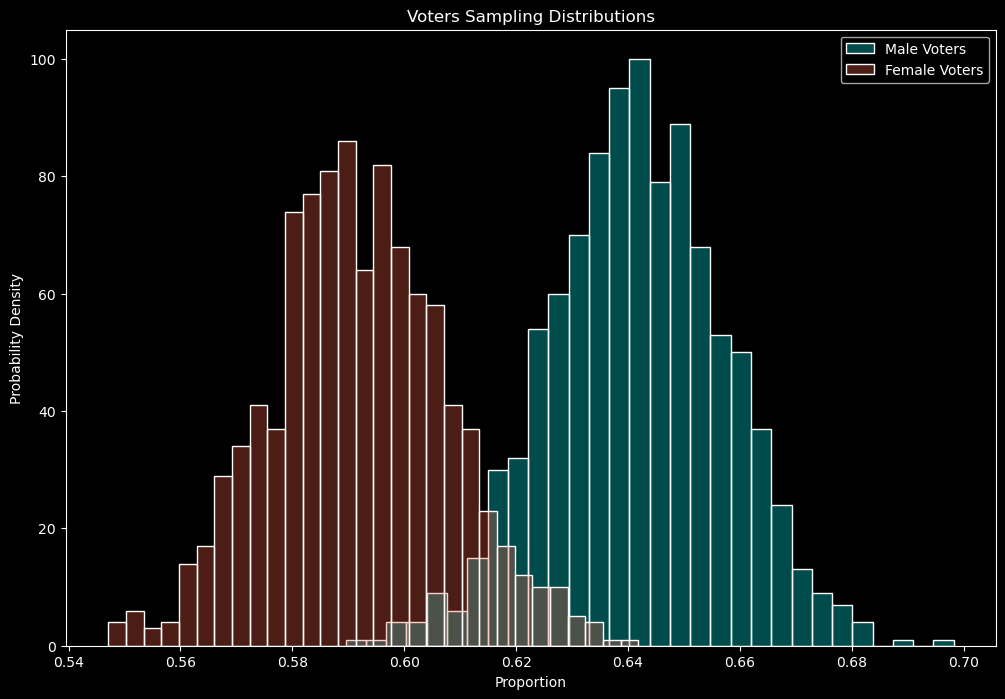

In [40]:
fig, ax = plt.subplots(figsize = (12, 8))
male_voter_distribution = st.norm(
    loc = male_voter_proportion,
    scale = sigma_male
)
male_voter_samples = male_voter_distribution.rvs(size = 1000)

sns.histplot(
    x = male_voter_samples,
    bins = 30,
    alpha = 0.3,
    color = "aqua",
    label = "Male Voters"
)
female_voter_distribution = st.norm(
    loc = female_voter_proportion,
    scale = sigma_female
)
female_voter_samples = female_voter_distribution.rvs(size = 1000)

sns.histplot(
    x = female_voter_samples,
    bins = 30,
    alpha = 0.3,
    color = "tomato",
    label = "Female Voters"
)
plt.xlabel("Proportion")
plt.ylabel("Probability Density")
plt.title("Voters Sampling Distributions")
plt.legend();

Sampling Distribution for the Difference between the two Proportions

In [41]:
sigma_diff = np.sqrt(male_voter_variance + female_voter_variance)

sample_proportion_diff = male_voter_proportion - female_voter_proportion
confidence_interval_z_score = round(st.norm.ppf(0.975), 2)

confidence_sigma_diff = round((confidence_interval_z_score * sigma_diff), 3)
print(f"The difference in sample proportions: {sample_proportion_diff:.3f}")
print(f"Standard deviation for sample proportion difference: {sigma_diff:.4f}")
print(f"The 95 % confidence interval for the sample proportions is between: {round((sample_proportion_diff - confidence_sigma_diff), 3)} to {round((sample_proportion_diff + confidence_sigma_diff), 3)}.")


The difference in sample proportions: 0.051
Standard deviation for sample proportion difference: 0.0217
The 95 % confidence interval for the sample proportions is between: 0.008 to 0.094.


## Hypothesis Testing
Ho: Null Hypothesis: 

- There is no difference, where p1 - p2 = 0 and therefore p1 = p2.

Ha: Alternative Hypothesis: 

- There is a difference, where p1 != p2 and therefore p1 - p2 != 0  

Significance level: 5%

In [42]:
sample_proportion = (642 + 591) / 2000
print(f'The sampling proportion: {sample_proportion}')

sigma_sample_proportion_difference = np.sqrt((2 * sample_proportion * (1 - sample_proportion)) / 1000)
print(f"The standard deviation for the sampling proportion of male & female voters: {round(sigma_sample_proportion_difference, 4)}")

proportion_z_score = (sample_proportion_diff - 0) / sigma_sample_proportion_difference
print(f"The Z-Score for the sampling difference between male and female voters: {round(proportion_z_score,2)}")

The sampling proportion: 0.6165
The standard deviation for the sampling proportion of male & female voters: 0.0217
The Z-Score for the sampling difference between male and female voters: 2.35


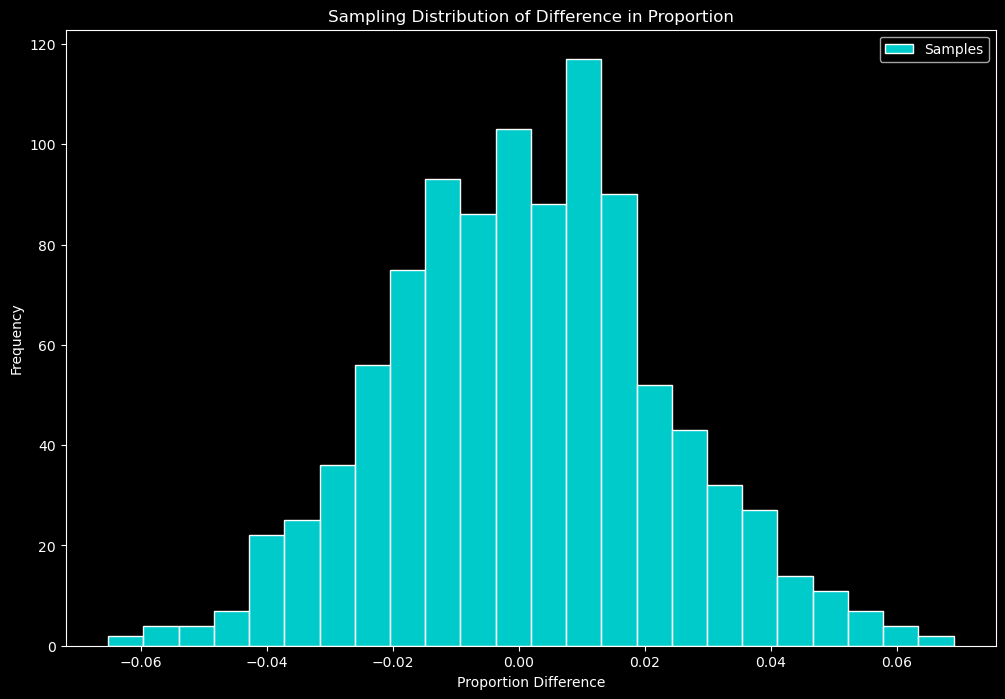

In [43]:
plt.figure(figsize = (12, 8))

sampling_dist = st.norm(
    loc = 0,
    scale = round(sigma_diff, 3) 
)
sampling_dist_combined = sampling_dist.rvs(size = 1000)

plot = sns.histplot(
    x = sampling_dist_combined,
    color = "cyan",
    alpha = 0.8,
    label = "Samples"
)
plot.set(
    xlabel = "Proportion Difference", 
    ylabel = "Frequency", 
    title = "Sampling Distribution of Difference in Proportion"
    )
plt.legend();

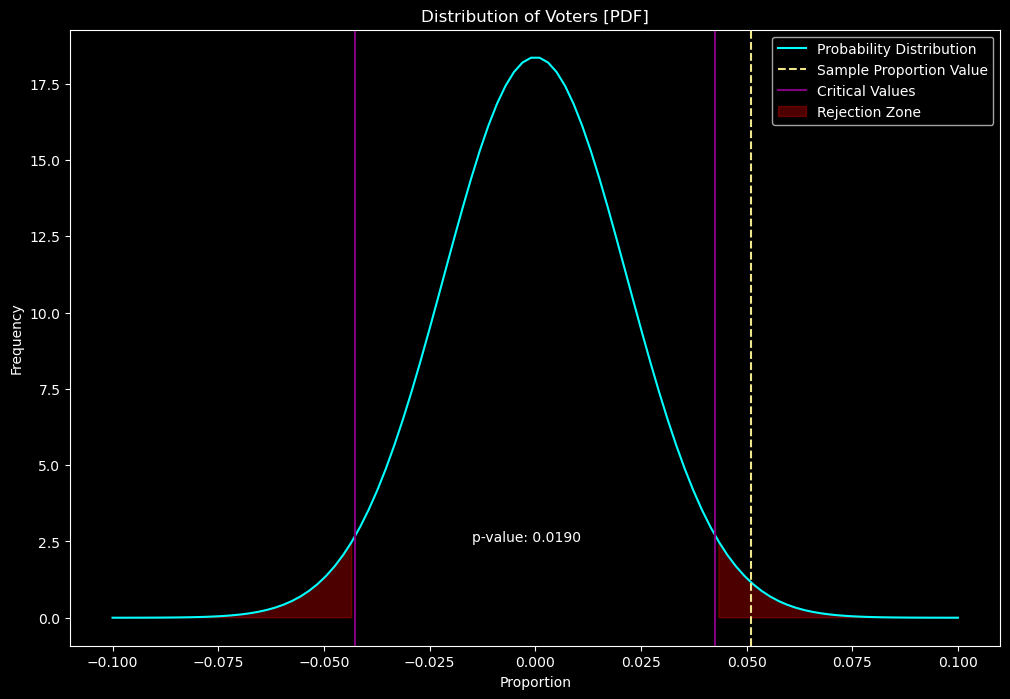

In [44]:
fig, ax = plt.subplots(figsize = (12, 8))
xs = np.linspace(-0.1, 0.1, 100)
ps = st.norm.pdf(xs, 0, sigma_diff)

lower_bound, upper_bound = 0 - (proportion_z_score * sigma_sample_proportion_difference ), 0 + (proportion_z_score * sigma_sample_proportion_difference) 

lower_threshold = st.norm.cdf(
    lower_bound,
    0,
    sigma_sample_proportion_difference
)

upper_threshold = st.norm.sf(
    upper_bound,
    0,
    sigma_sample_proportion_difference
)

critical_z_score = st.norm.ppf(0.975)

lower_critical, upper_critical = 0 - (critical_z_score * sigma_sample_proportion_difference), 0 +(critical_z_score * sigma_sample_proportion_difference)

area = lower_threshold + upper_threshold

plt.plot(
    xs,
    ps,
    color = "aqua",
    label = "Probability Distribution"
)

plt.axvline(
    upper_bound,
    ls = "--",
    color = "khaki",
    label = "Sample Proportion Value",
    )

plt.axvline(
    lower_critical,
    ls = "-",
    color = "purple"
)

plt.axvline(
    upper_critical,
    ls = "-",
    color = "purple",
    label = "Critical Values"
)

plt.fill_between(
    xs,
    ps,
    where = (xs <= lower_critical) | (xs >= upper_critical),
    color = "red",
    alpha = 0.3,
    label = "Rejection Zone"
    )

plt.annotate(f"p-value: {area:.4f}", (-0.015, 2.5))
plt.xlabel("Proportion")
plt.ylabel("Frequency")
plt.title("Distribution of Voters [PDF]")
plt.legend();

# Conclusion:
The calculated p-value of 0.019 is below the set significance level of 5%.

Therefore, we reject the null hypothesis and accept the alternative. 

There is a significant difference in the proportion of male and female voters.

---